In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'colorblind'
sns.set_palette(palette); sns.set_color_codes(palette)  # Fija los nombres cortos para los colores según la paleta de seaborn

# NumPy

NumPy (Numerical Python) es una librería para cómputo científico. Esta librería contiene muchas funciones matemáticas que permiten realizar operaciones de álgebra lineal, generar números pseudo-aleatorios, etc. De forma muy general el computo científico se basa en operar con arreglos de números, a veces estos arreglos representan matrices y vectores y las operaciones necesarias son fundamentalmente las del algebra lineal. En otros casos, como el análisis de datos, los arreglos de números no necesariamente (o no siempre) son vectores y matrices en estricto sentido matemático. Por ejemplo casi cualquier conjunto de datos puede ser pensado como un arreglo de números. Una imagen es un arreglo bidimensional de números donde cada número representa el brillo de un pixel. Un sonido es un arreglo unidimensional que representa intensidad versus tiempo.

En definitiva para el computo científico es necesario contar con formas eficientes de almacenar y manipular arreglos de números. Y NumPy ha sido diseñado para esta tarea. El código escrito en NumPy suele ser más corto que el código equivalente en _Python puro_. El uso de _loops_ es reducido ya que muchas operaciones se aplican directamente sobre arreglos (_arrays_). Esto se conoce como vectorizar el código, internamente los _loops_ siguen estando presentes pero son ejecutados por rutinas optimizadas escritas en lenguajes como C o Fortran. Además, NumPy provee de muchas funciones matemáticas/científicas listas para usar. Esto reduce la cantidad de código que debemos escribir (reduciendo las chances de cometer errores) y más importante, esas funciones están escritas usando implementaciones eficientes y confiables.

Para poder usar NumPy debemos importarlo, la forma más común de importar NumPy es la siguiente:

In [2]:
import numpy as np

## Arreglos (arrays)

NumPy usa una estructura de datos llamada arreglos. Los arreglos de NumPy son similares a las listas de Python, pero son mas eficientes para realizar tareas numéricas. La eficiencia deriva de las siguientes características:

* Las listas de Python son muy generales, pudiendo contener objetos de distinto tipo. Además los objetos son asignados dinamicamente, es decir el tamaño de una lista no está predefinido, siempre podemos agregar más y más elementos. 

* Por el contrario, los arreglos de NumPy son **estáticos**  y **homogéneos**. El tipo de los objetos se determina cuando el array es creado (de forma automática o por el usuario) lo que permite hacer uso eficiente de la memoria.

* Otra razón por la cual los arreglos son más eficientes que las listas es que en Python todo es un objeto, incluso los números! Por ejemplo en C un entero es esencialmente un rótulo que conecta un lugar en la memoria de la computadora cuyos _bytes_ se usan para codificar el valor de ese entero. Sin embargo en Python un entero es un objeto más complejo que contiene más información que simplemente el valor de un número. Esto da flexibilidad a Python, pero el costo es que es más lento que un lenguaje como C. Este costo es aún mayor cuando combinamos muchos de estos objetos en un objeto más complejo, por ejemplo cuando combinamos enteros dentro de una lista.

Otra ventaja de los arreglos es que se comportan de forma similar a los vectores y matrices usados en matemática.


### Creando arreglos

Existen varias rutinas para [crear](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) arreglos de NumPy a partir de:

* Listas o tuplas de Python
* Rangos numéricos
* Números aletorios
* Ceros y unos
* Archivos

#### A partir de listas y tuplas

Para crear arreglos a partir de listas (o tuplas) podemos usar la funcion **array**.

In [3]:
v = np.array([1, 2, 3, 4 , 5, 6])
v

array([1, 2, 3, 4, 5, 6])

In [4]:
M = np.array([[1, 2], [3, 4], [5, 6]])
M

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
v.shape, M.shape

((6,), (3, 2))

#### A partir de un rango numérico

Una forma de crear arreglos desde cero es usando rangos. Por ejemplo podemos crear un arreglos conteniendo números igualmente espaciados en el intervalo [desde, hasta), usando **arange**

In [6]:
np.arange(0, 10, 1) # desde, hasta(sin incluir), paso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Otra función para crear rangos es **linspace** que devuelve numeros igualmente espacios en el intervalo [desde, hasta] (es decir incluyendo el _hasta_). Otra diferencia con **arange** es que no se especifica el _paso_ si no la cantidad total de números que contendrá el arreglo.

In [7]:
np.linspace(1, 10, 25) # desde, hasta, elementos (elementos es opcional)

array([  1.   ,   1.375,   1.75 ,   2.125,   2.5  ,   2.875,   3.25 ,
         3.625,   4.   ,   4.375,   4.75 ,   5.125,   5.5  ,   5.875,
         6.25 ,   6.625,   7.   ,   7.375,   7.75 ,   8.125,   8.5  ,
         8.875,   9.25 ,   9.625,  10.   ])

#### A partir de números aleatorios

Los números aleatorios son usados en muchos problemas científicos. En la práctica las computadoras son solo capaces de generar números pseudo-aleatorios, _i.e._ números que para los fines prácticos lucen como números aleatorios.

Todas las rutinas para generar números aleatorios viven dentro del módulo [random](http://docs.scipy.org/doc/numpy/reference/routines.random.html). Python usa un algortimo llamado [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_twister) para generar números pseudo-aleatorios. Este algorítmo es más que suficiente para fines científicos, pero no es util en caso que necesitemos números pseudo-aleatorios para usar en criptografía.

La función mas simple es **rand**. Esta función crea un arreglo a partir de una distribución uniforme en el intervalo [0, 1).

In [8]:
np.random.rand(2, 5)  # arreglo con forma (2, 5)

array([[ 0.37273053,  0.07091579,  0.0939465 ,  0.38053846,  0.16809047],
       [ 0.60210991,  0.78186605,  0.19558962,  0.65426252,  0.98388425]])

De forma similar **randn** devuelve muestras a partir de la distribución normal estándar (media = 0, desviación estándard =1).

In [9]:
np.random.normal(0, 1, 10)

array([-0.6156688 , -0.20646645,  1.21696286, -1.87221307, -1.1207403 ,
       -1.20870308, -0.87718288,  1.13324787,  0.63832975, -0.27304633])

Los arreglos de NumPy, al igual que las listas se pueden indexar, y se pueden tomar rebanadas. La sintaxis es la misma que la de las lsitas solo que esta sintaxis puede ser más compleja ya que podemos ndexar de acuerdo a las dimensiones

In [10]:
M[0]

array([1, 2])

In [11]:
M[1,:]  # fila 1

array([3, 4])

In [12]:
M[:,1]  # columna 1

array([2, 4, 6])

## Funciones Universales (Ufunc)

NumPy provee de varias funciones matemáticas. Esto puede parecer redundante ya que la librería estandard de Python ya provee de este tipo de funciones. La diferencia, es que la funciones matemáticas de NumPy (como otras funciones) puede ser aplicadas en un solo paso a todos los elementos de un arreglo.

Por ejemplo, si quisieramos calcular la raíz cuadrada de todos los elementos de una lista de Python deberíamos hacer un loop sobre cada elementos de la lista y computar la raíz cuadrada a cada elemento (y posiblemente almacenarlo en otra lista).
Con NumPy podemos hacer esto en una sola linea.

Primero definamos un nuevo arreglo

In [13]:
np.sqrt(M)

array([[ 1.        ,  1.41421356],
       [ 1.73205081,  2.        ],
       [ 2.23606798,  2.44948974]])

Funciones como _sqrt_, que operan sobre arreglos _elemento-aelemento_ se conocen como [funciones universales](http://docs.scipy.org/doc/numpy/reference/ufuncs.html) (usualmente abreviadas como ufunc).

Una de las ventajas de usar ufuncs es que permiten escribir código más breve. Otra ventaja es que los cómputos son más rápidos que usando loops de Python. Detrás de escena NumPy si realiza un loop, pero el loop se realiza en un legunaje como C o Fortran, por lo que hay una ganancia considerable en velocidad, respecto de código en Python puro. Además, el código usado por NumPy es código que suele estar optimizado gracias a los años de labor de programadores/científicos.

In [14]:
np.sum(M)

21

En el ejemplo anterior la suma se hizo sobre el arreglo "aplanado". Hay veces que esto no es lo que queremos, si no que necesitamos sumar sobre alguna de las dimensiones del arreglo.

In [15]:
np.sum(M, axis=0)

array([ 9, 12])

In [16]:
np.sum(M, axis=1)

array([ 3,  7, 11])

## Medidas de centralidad y dispersión (usando NumPy)


En el capítulo anterior vimos como calcular la media y la mediana y la varianza. NumPy nos permite calcular estas cantidades a partir de arrays de forma muy simple. Por ejemplo para calcular la media podemos escribir.

In [17]:
np.mean(v)

3.5

Una forma alternativa es la siguiente

In [18]:
v.mean()

3.5

### Desviación estándar

La desviación estándar es la raíz cuadrada de la varianza, en muchos problemas teóricos resulta más fácil manipular varianzas que desviaciones estándar, pero en general resulta más simple interpretar las desviaciones estándar ya que las unidades son las mismas que la de los datos.

$$\sigma = \sqrt{V(x)}$$

In [19]:
print('varianza {:.2f}'.format(np.var(v)))
print('desviación estándar {:.2f}'.format(np.std(v)))

varianza 2.92
desviación estándar 1.71


Existen otras medidas para caracterizar los datos, llamadas de forma, como son la [curtosis](https://en.wikipedia.org/wiki/Kurtosis) y el [sesgo](https://en.wikipedia.org/wiki/Skewness) (o asimetría estadística).

Estás medidas son menos usadas en parte por que su interpretación es menos intuitiva que otras medidas como la media o la varianza, al punto que la interpretación correcta de estas medidas ha sido objeto de varias discusiones y malos entendidos a los largo de los años. Otra razón para su menor uso es que históricamente gran parte de la estadística se ha basado en el uso de Gausianas (o en asumir que los datos son Gaussianos) para las cuales la curtosis y el sesgo son cero.

### Cuantil

Los [cuantiles](https://en.wikipedia.org/wiki/Quantile) son puntos de corte que dividen al conjunto de datos en grupos de igual tamaño. Existen varios nombres para  los cuantiles según la cantidad de divisiones que nos interesen.

* Los cuartiles son los tres puntos que dividen a la distribución en 4 partes iguales, se corresponden con los cuantiles 0.25, 0.50 y 0.75.
* Los quintiles dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80);
* Los deciles, que dividen a la distribución en diez partes.
* Los percentiles, que dividen a la distribución en cien partes.
* La mediana es el percentil 50 o el cuartil 0.5.
    
En Python el cálculo de estos estadísticos puede realizarse fácilmente usando funciones predefinidas en NumPy.

In [23]:
x = np.random.normal(0, 1, 100)
'percentiles 25={:.2f}; 50={:.2f}; 75={:.2f}'.format(*(np.percentile(x , [25, 50, 75])))

'percentiles 25=-0.72; 50=0.13; 75=0.80'

### Z-score

Es una cantidad adimensional que expresa que indica el número de desviaciones estándar que un dato está por encima o por debajo de la media. Cuando el Z-score es positivo el dato está por encima de la media y cuando es negativo está por debajo de la media. Se calcula como

$$z = \frac{x - \mu}{\sigma}$$

Donde:

$\mu$ es la media de la población
$\sigma$ es la desviación estándar de la población

El proceso de restar la media y dividir por la desviación estándar se llama normalización o estandarización.

### Error estándar

El error estándar es la desviación estándar de alguna medida estimada, por lo general la media (aunque podría ser cualquier otra cantidad).

Si tomamos un conjunto de datos y calculamos la media de esos datos y luego tomamos otra muestra y calculamos la media y luego otra y otra, obtendremos que los valores de la media no son siempre los mismos. Si tomamos todas esas medias obtendremos una distribución de medias con una media y desviación estándar esa desviación estándar será el error estándar de la media. El error estándar de la media se suele estimar como: 

$$\frac{\sigma}{\sqrt(n)}$$

donde $\sigma$ es la desviación estándar de los datos y $n$ la cantidad de datos.


La medidas de centralidad y dispersión antes mencionadas son útiles por que resumen en pocos números una gran cantidad de datos. Sin embargo, al sintetizar la información, también pueden ocultarla. Es por ello que siempre es buena idea visualizar la distribución de los datos. A continuación veremos como usar Python para graficar datos.

## Gráficos

Los gráficos ocupan un lugar central en la estadística, ya sea en el análisis exploratorio de datos como en la estadística inferencial. Gran parte de la estadística moderna tiene que ver con vizualización de datos por lo que es buena idea que empecemos a ver como generar algunos `plots` sencillos.

Existen varias bibliotecas para hacer gráficos en Python, Matplolib es una de las más usadas. Para importarla haremos lo siguiente:

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

La primer linea es para decirle a la Notebook que los gráficos queden _embebidos_ en la notebook (si no estuvieramos usando la notebook no escribiríamos esta linea).

La segunda linea es la forma estándard de importar matplotlib. Fijensé que al escribir `as plt` estamos diciendo que accederemos a las funciones contenidas en `matplotlib.pyplot` como `plt`, esto lo hacemos ya que escribir `plt` es más cómodo que escribir `matplotlib.pyplot`.

Veamos como hacer un gráfico sencillo.

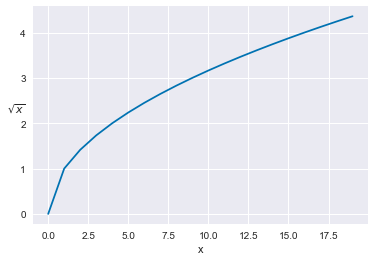

In [25]:
x = range(20)
y = [i ** 0.5 for i in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$\sqrt{x}$', rotation=0);

* En la primer y segunda linea estamos "generando" datos.
* En la tercer linea decimos que queremos generar un gráfico del tipo `plot` (ya veremos que los hay de otros tipos), donde graficaremos `x` vs `y`.
* En la cuarta y quinta linea agregámos rótulos a los ejes. En la quinta linea usamos la misma notación usada por [$LaTeX$](https://es.wikipedia.org/wiki/LaTeX) para escribir fórmulas matemáticas. $LaTeX$ es un _lenguaje_ para escribir textos que es muy usado en muchas disciplinas científicas para escribir papers, posters, diapositivas, libros, etc.

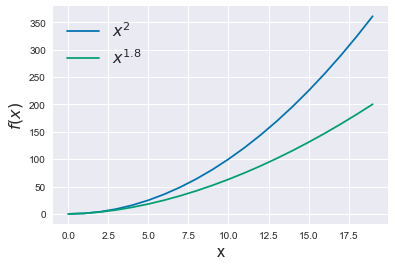

In [26]:
x = range(20)
y = [i ** 2 for i in x]
z = [i ** 1.8 for i in x]
plt.plot(x, y, label=r'$x^2$')
plt.plot(x, z, label=r'$x^{1.8}$')
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$f(x)$', fontsize=16)
plt.legend(fontsize=16)

Existen muchos tipos de gráficos para representar datos. A continuación veremos cinco representaciones comunes de datos unidimensionales:

* histogramas
* _kernel plots_
* _stripplot_
* _box plots_
* _violin plots_

### Histogramas

En un [histograma](https://en.wikipedia.org/wiki/Histogram) se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar valores discretos entre grupos y mientras que los histogramas se usan para representar distribuciones.

Los histogramas son sensibles a la cantidad de _bins_ que se usan. Si usamos unos pocos _bins_ no lograremos capturar la estructura de los datos, si usamos demasiados _bins_ no solo estaremos representando la estructura de los datos si no también el ruido. Esto se ve más claramente si nos vamos a los extremos, por un lado tendríamos un sola barra, por el otro una barra por cada dato.

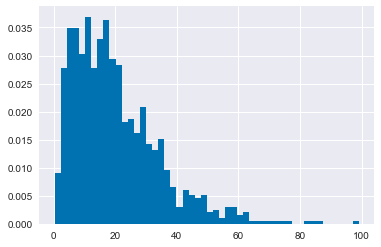

In [27]:
x = np.random.gamma(2, 10, size=1000)
#x = np.random.normal(0, 1, size=1000)

plt.hist(x, bins=50, normed=True, cumulative=False);  # probá cambiar los bins, y los demás argumentos.

Aprovechando lo que hemos aprendido generemos un gráfico que muestre la diferencia entre media y mediana

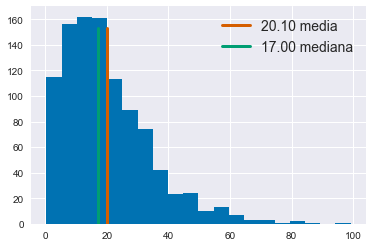

In [28]:
plt.hist(x, bins=20)
media = np.mean(x)
mediana = np.median(x)

plt.axvline(media, ymax=.9, c='r', lw='3', label='{:.2f} media'.format(media))
plt.axvline(mediana, ymax=.9, c='g', lw='3', label='{:.2f} mediana'.format(mediana))
plt.legend(fontsize=14);

### Kernel Density plot

Es una forma _suavizada_ de un histograma. Un gráfico [_KDE_](https://en.wikipedia.org/wiki/Kernel_density_estimation) se dibuja de la siguiente forma: se reemplaza cada dato por una distribución Gaussiana y luego se suman todas las Gaussianas. En vez de una distribución Gaussiana es posible usar otras distribuciones. El nombre genérico para esas distribuciones cuya suma se usa como aproximación de una función es el de _kernel_. Cualquier función simétrica cuya integral sea 1 puede ser usada como kernel, la Gaussiana es una de los kernels más usados.

De forma análoga a lo que sucede con los _bins_ los KDE son sensibles a un parámetro llamado _bandwith_. Existen varias _heurísticas_ (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el _bandwith_ de forma automática de acuerdo a los datos.

Es posible usar matplotlib para graficar un kde, pero no existe una función que lo haga de forma automática. Es decir es posible pero requiere de cierto trabajo. Lo mismo sucede con otros tipos de gráficos usados para analizar datos, es por ello que existe una biblioteca llamada Seaborn, la cual _no es más_ que una colección de funciones escritas usando matplotlib. Si prestan atención a la primer celda verán que importamos seaborn de la siguiente forma.

    import seaborn as sns
    
Usando Seaborn, podemos hacer un kde de forma muy simple

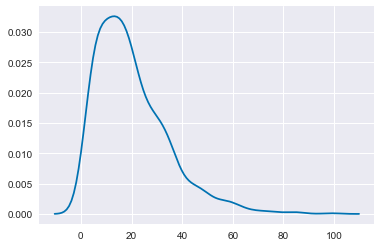

In [29]:
sns.kdeplot(x);   #también ver la función sns.distplot()

Como Seaborn está escrito usando Matplotlib, podemos modificar los gráficos realizado con Seaborn usando Matplotlib. un sencillo ejemplo que muestra que esto es posible es el siguiente.

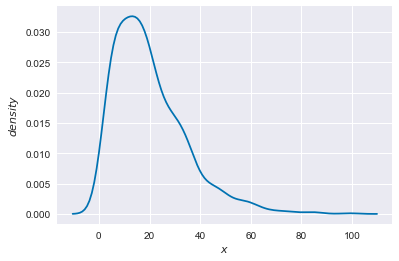

In [30]:
sns.kdeplot(x)
plt.xlabel('$x$')
plt.ylabel('$density$');

### Stripplot

Este tipo de gráficos sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función _strippplot_ de seaborn (un gráfico similar es el _swarmplot_). Los stripplot se suelen graficar agregado un poco de ruido/fluctuaciones (_jitter_ en inglés) en lo largo del eje de las $x$, esto es simplemente un _truco_ para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma linea ya que las variables categóricas no tienen dispersión.

Puede ser útil en si mismo o puede ser usado superpuesto sobre un _boxplot_ o _violinplot_. 

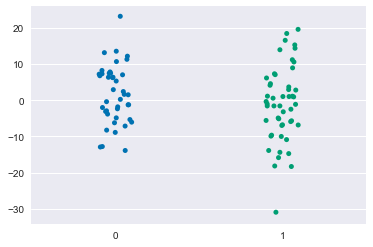

In [31]:
y0 = np.random.normal(0, 10, size=42)
y1 = np.random.normal(-1, 10, size=50)
sns.stripplot(data=[y0, y1], jitter=True);

### Gráficos de cajas o de bigotes (Box plot o Wisker-plot)

Los [gráficos de caja](https://en.wikipedia.org/wiki/Box_plot) son una forma de graficar distribuciones basada en cuartiles. Al igual que el _stripplot_ este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultaneo. La caja está delimitada por el primer y tercer cuartil, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un boxplot, a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango intercuartil y los valores por fuera de los bigotes se suelen considerar como datos aberrantes (ver más adelante).

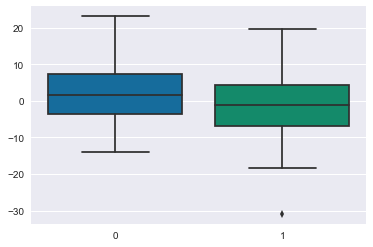

In [32]:
sns.boxplot(data=[y0, y1]);

### Gráficos de violín (violin plot)

Los gráficos de [violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde.

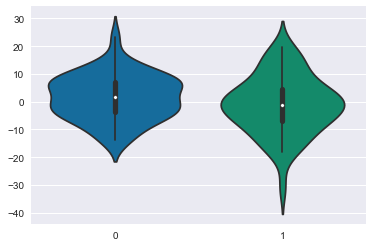

In [33]:
sns.violinplot(data=[y0, y1]);

### Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los datos aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato _aberrante_ fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento!

Existen varios criterios para identificar datos aberrantes. Dos muy usados son:
   * todo valor por debajo de $\mu$-n$\sigma$ y por encima de $\mu$+n$\sigma$. Donde n = 1, 2, 3, 6 etc...
   * Se define el rango intercuartil como $IQR = q2 − q3 = p25-p75$ y se define como _aberrante_ todo valor por debajo de $q2-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación estándar.

Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estandard. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandard, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7 es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estandard, el 95 dentro de 2 y el 99.7 dentro de 3.

## Relación entre dos variables

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque _sns.kdeplot()_ soporta la visualización de dos variables). En muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

###  Gráfico de dispersión

Un [gráfico de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) es un gráfico científico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultaneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [34]:
x = np.random.normal(size=1000)
y = np.random.normal(loc=x, scale=1) 

Usando matplotlib podemos graficar ambas variables usando la función _scatter_

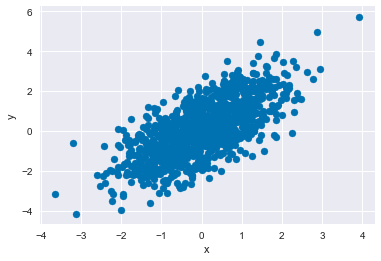

In [35]:
plt.scatter(x, y, alpha=1)
plt.xlabel('x')
plt.ylabel('y');

Seaborn provee de múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función _joinplot_. Esta función además de mostrar el gráfico de dispersión muestra las distribuciones marginales de $x$ e $y$.

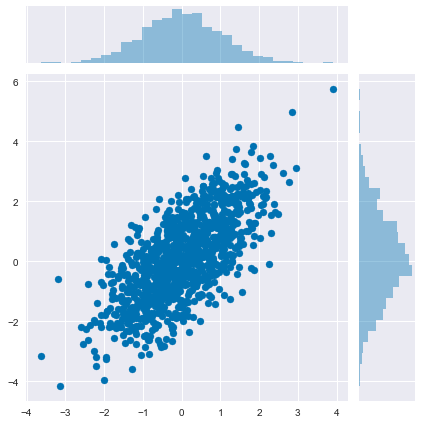

In [36]:
sns.jointplot(x, y,  kind='scatter', stat_func=None);

El siguiente gráfico usa un _kernel density estimation_ como vimos anteriormente, lo hace tanto para las distribuciones marginales como la distribución conjunta.

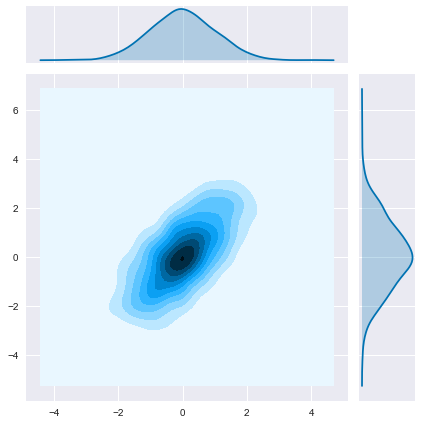

In [37]:
sns.jointplot(x, y,  kind='kde', stat_func=None);

Un gráfico de _hexbin_ es similar a un histograma, pero bidimensional. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente por que las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más simétrica. 
* Los hexágonos son el polígono con mayor número de lados que mejor cubren ([teselan](https://es.wikipedia.org/wiki/Teselado)) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Un malla cuadrada nos hace que tendamos a mirar en sentido horizontal y vertical.

Los hexbin son útiles cuando necesitamos visualizar muchos datos. Por muchos me refiero a números por encima de las centenas de miles de datos. Cuando tenemos una gran cantidad de datos los puntos empiezan a superponerse y puede que ciertos patrones pasen desapercibidos, por lo que visualizar datos agrupados y no los datos _crudos_ suele ser buena idea. Además calcular los _hexbin_ tiene un costo menor que los KDE.

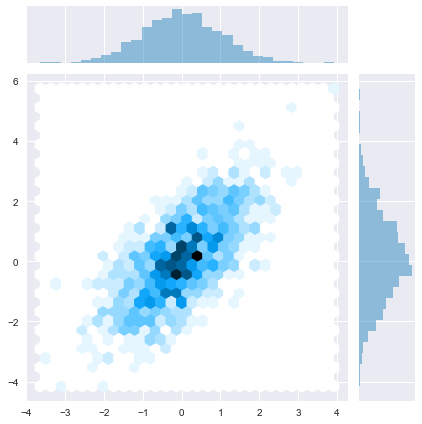

In [38]:
sns.jointplot(x, y,  kind='hex', stat_func=None);  # ver también plt.hexbin();

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión _común_, es hacer los puntos semitransparentes. En matplotlib la transparencia de los objetos es controlada mediante un parámetro llamado _alpha_ que va entre 0 y 1. Este es un buen momento para volver algunas celdas atrás y ver como este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### Correlación

Al trabajar con dos variables resulta por lo general interesante preguntarse por la relación entre ellas. Decimos que dos variables están relacionadas si una provee _información_ sobre la otra. Si en cambio una variable no ofrece información sobre otra decimos que son independientes. 

La correlación es una medida de la dependencia de dos variables. Existen varios coeficientes de correlación el más comunmente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estándar:

$$\rho_{(x,y)}={E[(x-\mu_x)(y-\mu_y)] \over \sigma_x\sigma_y}$$

En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica como varia una variable al variar la otra respecto de la variación intrínseca de cada una de las variables.

¿Por que usar el coeficiente de Pearson y no directamente la covarianza? Por que al dividir por el producto de las varianzas estámos estandarizando el coeficiente y por lo tanto simplificando su interpretación al hacerlo independiente de la unidades de nuestras variables. Al dividir por las desviaciones estándar, obtenemos una cantidad que varía entre -1 y 1 y que no tiene dimensiones! 

La función _joinplot_, que vimos en el apartado anterior, por defecto nos devuelve el valor del coeficiente de correlación de Person, junto con un _valor p_ cuyo significado estudiaremos en el capítulo sobre estadística frecuentista.

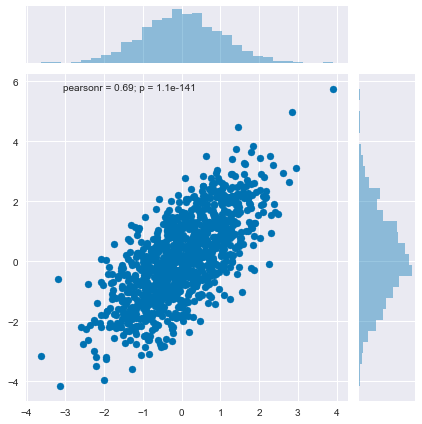

In [39]:
sns.jointplot(x, y,  kind='scatter');

Identificar correlaciones puede ser útil para entender como dos variables se relacionan y para predecir una a partir de la otra. Es por ello que muchas veces además de visualizar la relación entre variables se estiman modelos que _ajustan_ a los datos. Como por ejemplo lineas rectas. En los próximos capítulos veremos como crear modelos lineales y no-lineales. Por ahora simplemente nos conformaremos con dejar que seaborn ajuste los datos a un recta por nosotros.

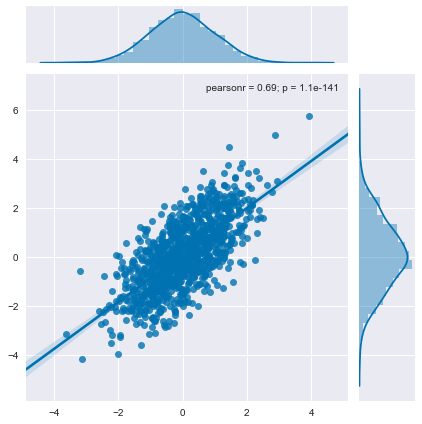

In [40]:
sns.jointplot(x, y,  kind='reg');

En la siguiente imagen se puede ver varios conjuntos de datos y sus respectivos coeficientes de correlación de Pearson. Es importante notar que el coeficiente de correlación de Pearson refleja la linearidad y la dirección de dicha linearidad (primera fila), pero no la pendiente de dicha relación (fila del medio). Tampoco es capaz de capturar relaciones no-lineales. En la fila del medio la línea con pendiente cero tiene un coeficiente de correlación de Pearson indefinido, ya que la varianza de la variable $y$ es 0.

<img src='imagenes/Correlación.png' alt="correlación", width=600, height=600> 

#### Correlación y causalidad

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones [espurias](http://www.tylervigen.com/). Por ejemplo en la siguiente figura se puede ver que el número piratas y la media de la temperatura global están inversamente correlacionados.

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/de/PiratesVsTemp%28en%29.svg/1024px-PiratesVsTemp%28en%29.svg.png' alt="Pirates_temp", width=600, height=600> 

Este gráfico fue creado a propósito para ilustrar, entre otros puntos, que correlación no implica causalidad (notesé además que el orden de los datos en el eje $x$ es erróneo y la escala es al menos _problemática_). Para más detalles del origen de esta gráfica leer esta entrada de [wikipedia](https://es.wikipedia.org/wiki/Pastafarismo#Los_piratas_y_el_calentamiento_global) 

La aparente relación entre las variables temperatura media y cantidad de piratas podría ser explicada de varias formas, quizá es pura casualidad o quizá se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado por un aumentando la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero ¡no es cierto que podamos contrarrestar el calentamiento global simplemente aumentando la cantidad de piratas!

Para poder establecer una relación causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica  causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd">

## Para seguir leyendo

* [wikipedia :-)](http://en.wikipedia.org)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Data Analysis with Open Source Tools](http://shop.oreilly.com/product/9780596802363.do)